# Botanical research
## Build a classifier capable of determining a flower's species from a photo.

In [1]:
import os
import random

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import cv2

In [2]:
import tensorflow as tf
tf.random.set_seed(1)

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [5]:
from tflearn.datasets import oxflower17

X, y = oxflower17.load_data(one_hot=True, shuffle=True)

100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [6]:
print('The shape of input dataset {}'.format(X.shape))

The shape of input dataset (1360, 224, 224, 3)


In [7]:
print('Minimum value of X:', X.min())
print('Maximum value of X:', X.max())

Minimum value of X: 0.0
Maximum value of X: 1.0


In [8]:
print('Total classes of flowers:', len(np.unique(y.argmax(axis=1))))

Total classes of flowers: 17


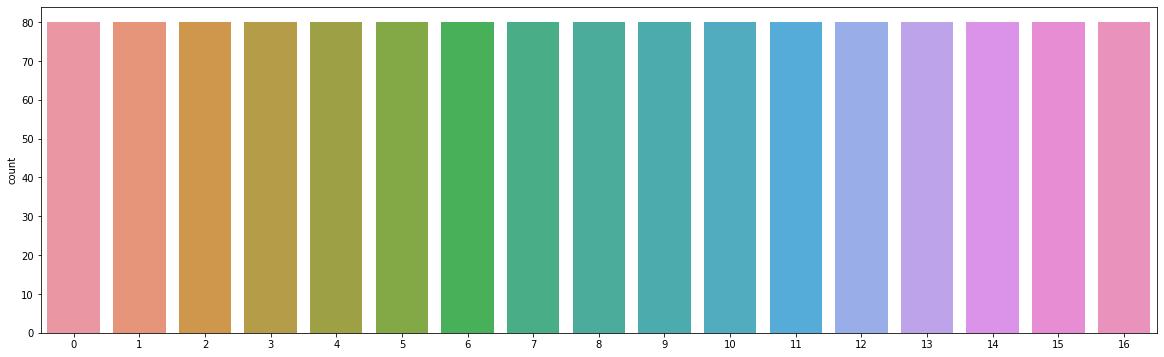

In [9]:
plt.figure(figsize=(20, 6))
sns.countplot(y.argmax(axis=1))
plt.show()

#### Observations:
1. There are total of 1,360 images available of size 224x224. 
2. There are 3 channels available hence images are colored images.
3. the images are normalized between 0 and 1.
4. There are 17 classes available of the flowers.
5. It can be clearly seen that each class is having equal number of images hence there is no class imbalanced problem.

### Image Visualization

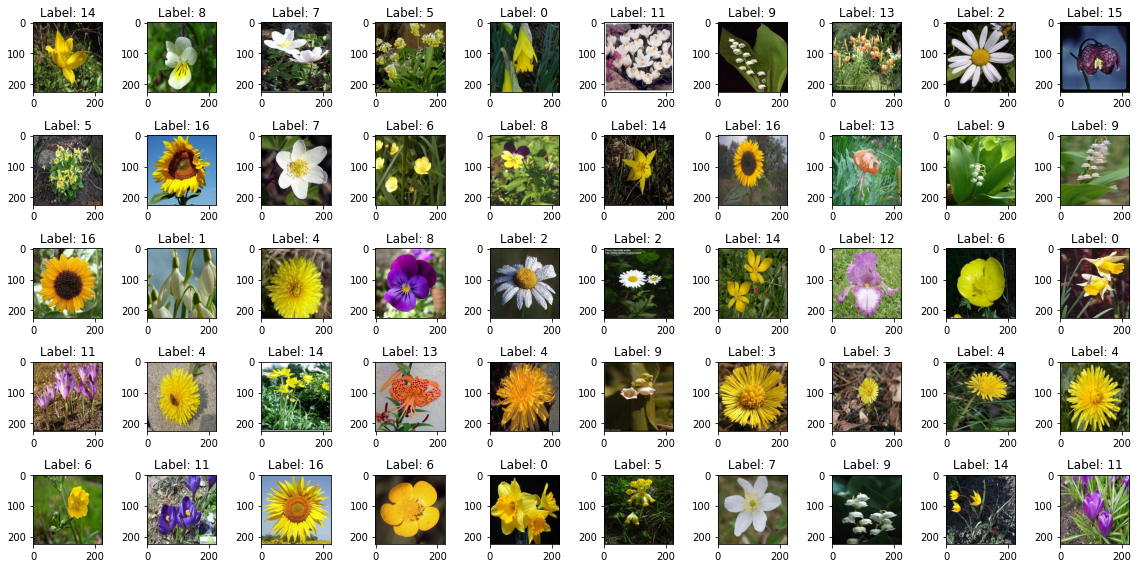

In [10]:
fig = plt.figure(figsize=(16, 8))
columns = 10
rows = 5

for i in range(1, columns*rows+1):
    img = X[i]
    ax = fig.add_subplot(rows, columns, i, title='Label: ' + str(np.argmax(y[i])))
    plt.imshow(img)

fig.tight_layout()
plt.show()

### Applying various filter

In [11]:
X_unorm = X * 255.0
X_unorm = X_unorm.astype(np.uint8)

**Blur Filter**

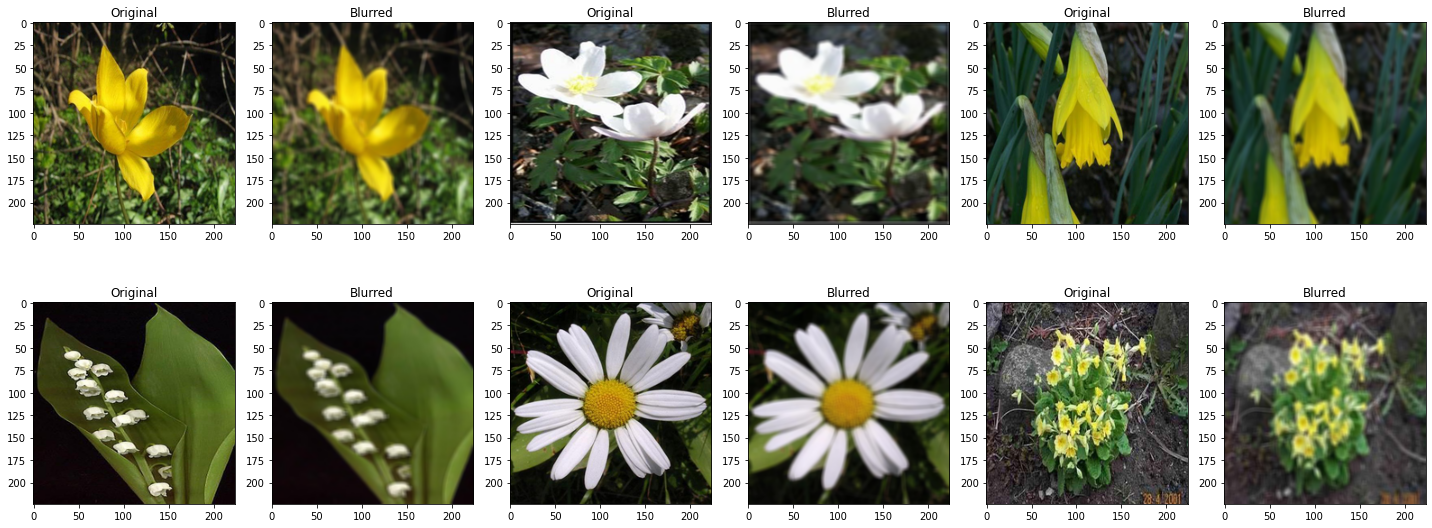

In [12]:
fig = plt.figure(figsize=(20, 8))
columns = 6
rows = 2

for i in range(1, columns*rows+1):
    if i % 2 == 0:
        img = cv2.blur(X_unorm[i-1], (5, 5))
        ax = fig.add_subplot(rows, columns, i, title='Blurred')
    else: 
        img = X_unorm[i]
        ax = fig.add_subplot(rows, columns, i, title='Original')
    plt.imshow(img)

fig.tight_layout()
plt.show()

**Contours**

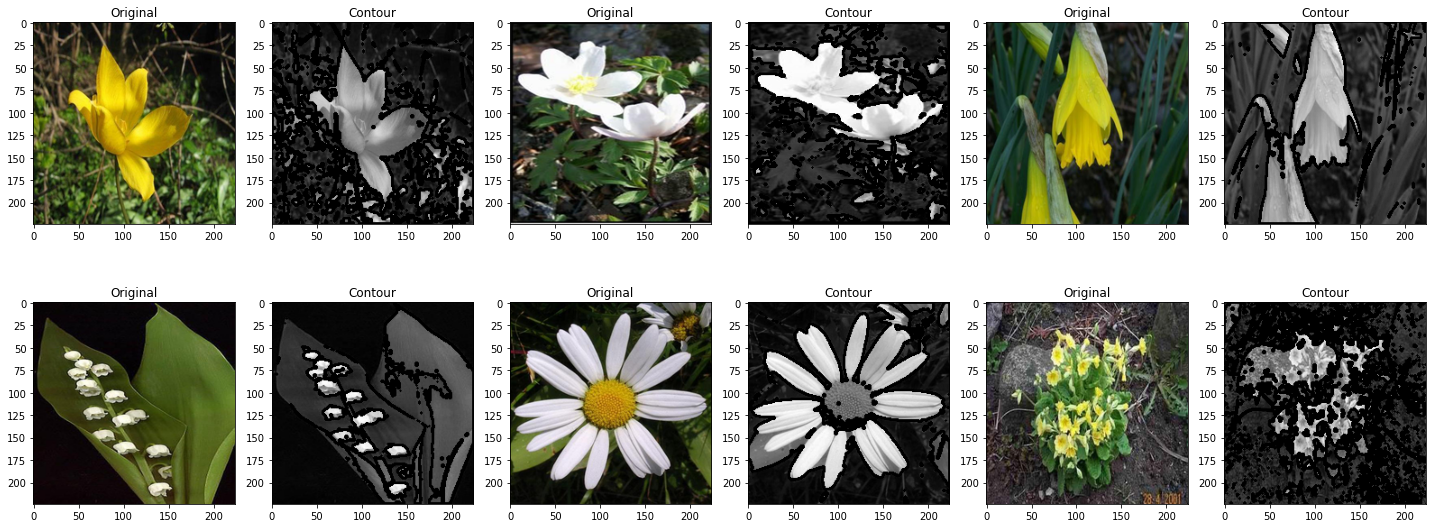

In [13]:
fig = plt.figure(figsize=(20, 8))
columns = 6
rows = 2

for i in range(1, columns*rows+1):
    if i % 2 == 0:
        img_gray = cv2.cvtColor(X_unorm[i-1], cv2.COLOR_BGR2GRAY)
        ret, thresh = cv2.threshold(img_gray, 70, 255, cv2.THRESH_BINARY)
        contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        cv2.drawContours(img_gray, contours[0], -1, (0, 0, 255), thickness=2)

        ax = fig.add_subplot(rows, columns, i, title='Contour')
        plt.imshow(img_gray, cmap='gray')
    else: 
        img = X_unorm[i]
        ax = fig.add_subplot(rows, columns, i, title='Original')
        plt.imshow(img)

fig.tight_layout()
plt.show()

**Edge Detection**

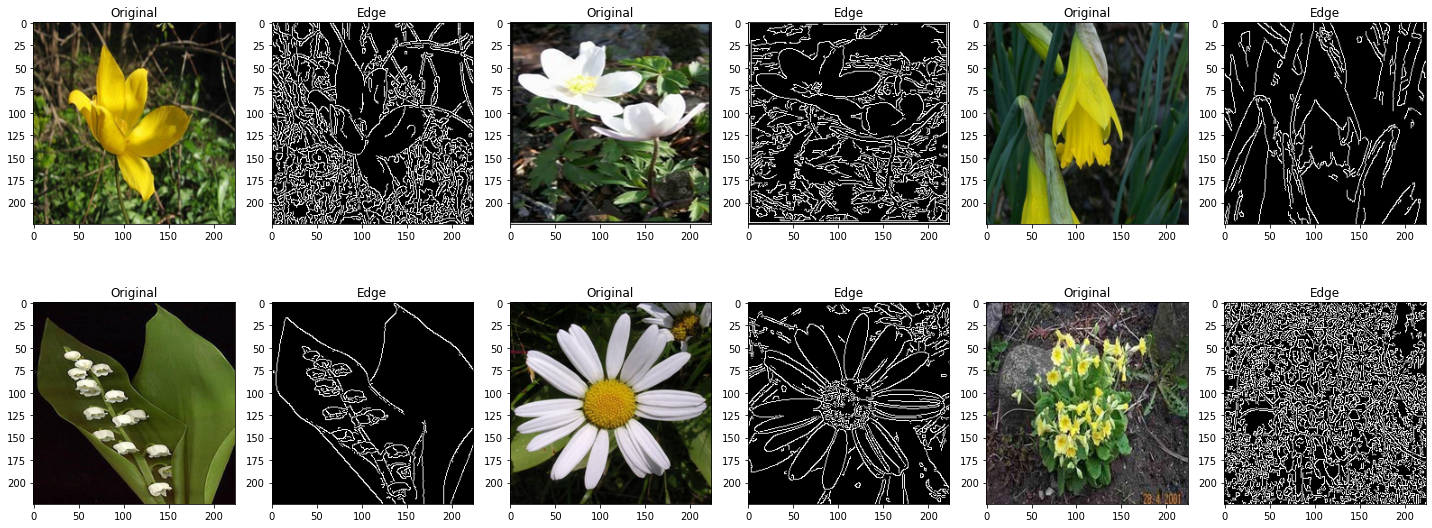

In [14]:
fig = plt.figure(figsize=(20, 8))
columns = 6
rows = 2

for i in range(1, columns*rows+1):
    if i % 2 == 0:
        img_gray = cv2.cvtColor(X_unorm[i-1], cv2.COLOR_BGR2GRAY)
        edge = cv2.Canny(img_gray, 60, 180)

        ax = fig.add_subplot(rows, columns, i, title='Edge')
        plt.imshow(edge, cmap='gray')
    else: 
        img = X_unorm[i]
        ax = fig.add_subplot(rows, columns, i, title='Original')
        plt.imshow(img)

fig.tight_layout()
plt.show()

**Emboss Filtering**

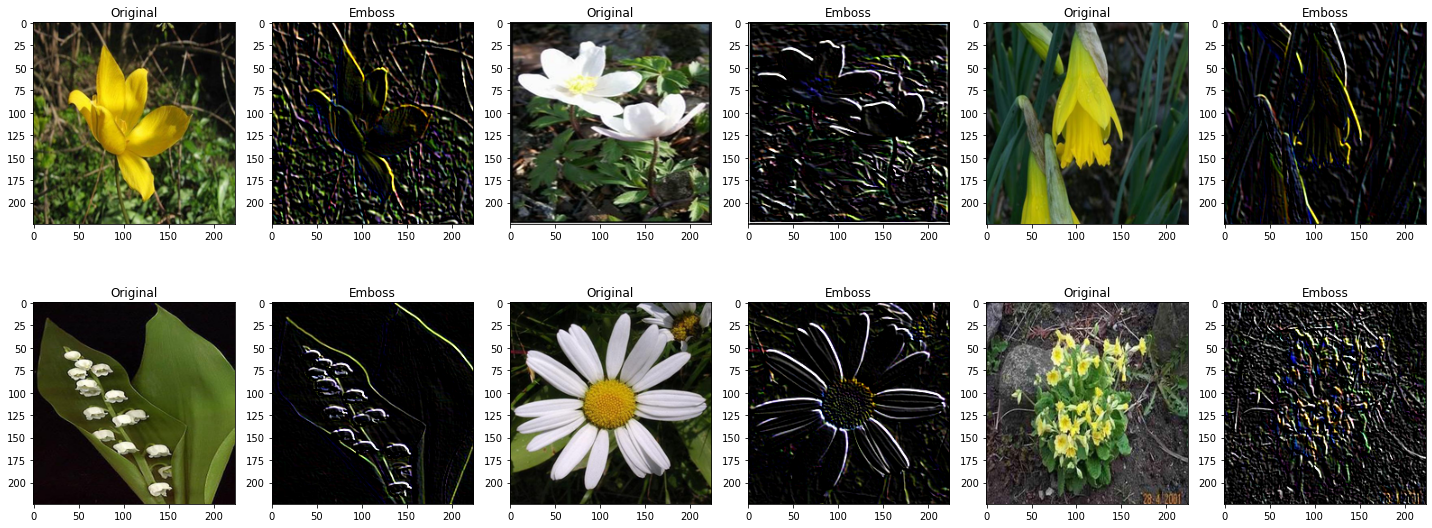

In [15]:
fig = plt.figure(figsize=(20, 8))
columns = 6
rows = 2

emboss_kernel = np.array([[0,-1,-1], [1,0,-1], [1,1,0]])

for i in range(1, columns*rows+1):
    if i % 2 == 0:
        emboss_img = cv2.filter2D(X_unorm[i-1], -1, emboss_kernel)

        ax = fig.add_subplot(rows, columns, i, title='Emboss')
        plt.imshow(emboss_img)
    else: 
        img = X_unorm[i]
        ax = fig.add_subplot(rows, columns, i, title='Original')
        plt.imshow(img)

fig.tight_layout()
plt.show()

**Gaussian Blur**

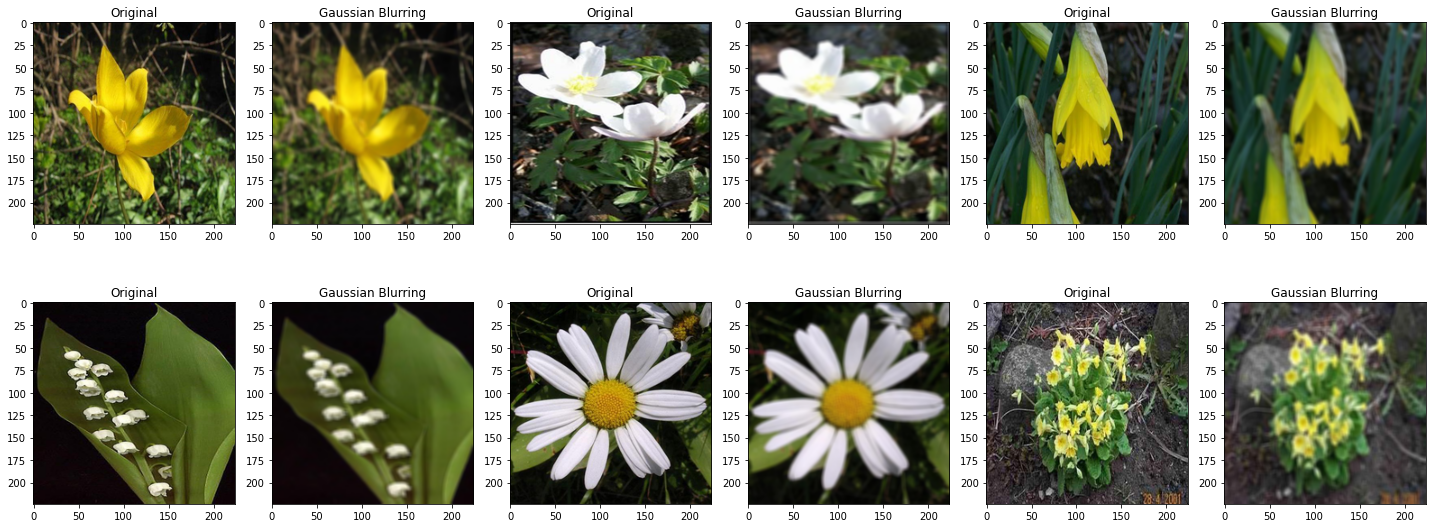

In [16]:
fig = plt.figure(figsize=(20, 8))
columns = 6
rows = 2

for i in range(1, columns*rows+1):
    if i % 2 == 0:
        emboss_img = cv2.GaussianBlur(X_unorm[i-1], (5, 5), 3, 3)

        ax = fig.add_subplot(rows, columns, i, title='Gaussian Blurring')
        plt.imshow(emboss_img)
    else: 
        img = X_unorm[i]
        ax = fig.add_subplot(rows, columns, i, title='Original')
        plt.imshow(img)

fig.tight_layout()
plt.show()

**Laplacian Gradient**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


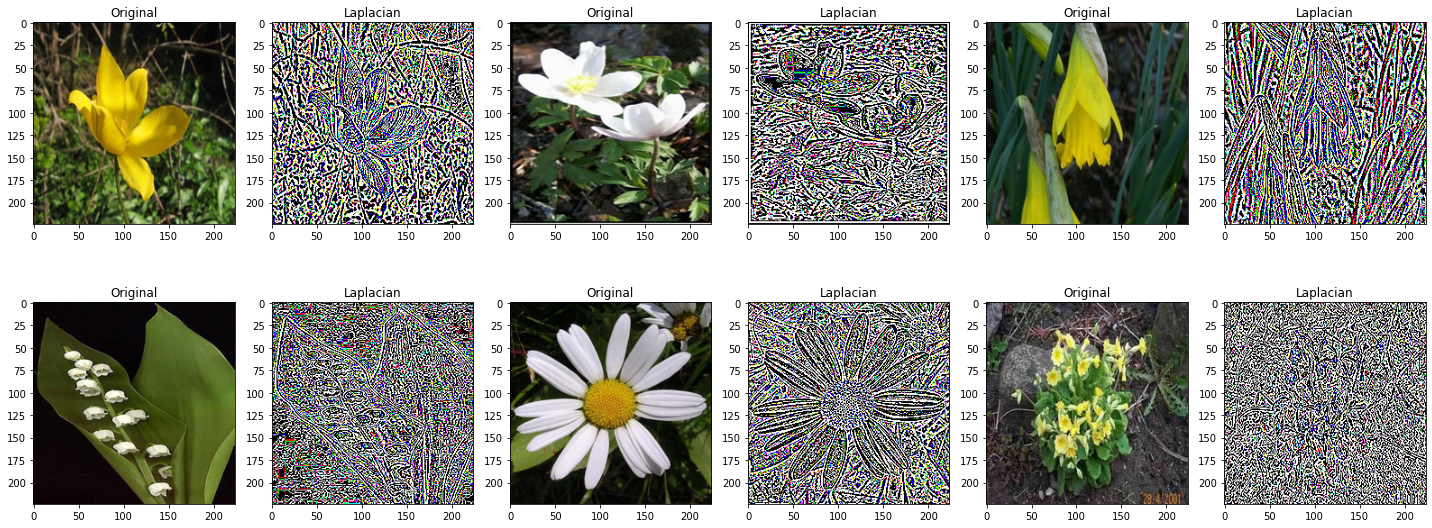

In [17]:
fig = plt.figure(figsize=(20, 8))
columns = 6
rows = 2

for i in range(1, columns*rows+1):
    if i % 2 == 0:
        emboss_img = cv2.Laplacian(X_unorm[i-1], cv2.CV_64F)

        ax = fig.add_subplot(rows, columns, i, title='Laplacian')
        plt.imshow(emboss_img)
    else: 
        img = X_unorm[i]
        ax = fig.add_subplot(rows, columns, i, title='Original')
        plt.imshow(img)

fig.tight_layout()
plt.show()

### Splitting the data into training and testing

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print('Shape of training dataset: {}'.format(X_train.shape))
print('Shape of testing dataset: {}'.format(X_test.shape))

Shape of training dataset: (1088, 224, 224, 3)
Shape of testing dataset: (272, 224, 224, 3)


## Classifier model using supervised learning

As the dataset is in 4 dimension, in order to train supervised learning algorithsm, the dataset needs to be converted into 2 dimension. The steps we will doing:
1. Convert the images into grayscale
2. Flatten the grayscaled numpy array
3. Applying PCA to reduce the dimensions
4. Fit the dataset into multiple supervised algorithms and find out the best score trained model
5. Tune the hyperparameters of the best model to get best accuracy.

### Converting image into grayscale and flattening

In [19]:
def convert_image(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = img_gray.flatten()
    return img_gray

In [20]:
X_train_converted = np.array([convert_image(x) for x in X_train])
X_test_converted = np.array([convert_image(x) for x in X_test])

In [21]:
print('The shape of converted X_train:', X_train_converted.shape)
print('The shape of converted X_test:', X_test_converted.shape)

The shape of converted X_train: (1088, 50176)
The shape of converted X_test: (272, 50176)


### Applying PCA to reduce dimensions

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)

X_train_pca = pca.fit_transform(X_train_converted)
X_test_pca = pca.transform(X_test_converted)

### Identifying the best model

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

In [24]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=11)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVC', SVC()))
models.append(('XGB', XGBClassifier(eval_metric='logloss')))

In [25]:
results = list()
names = list()

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train_pca, y_train.argmax(axis=1), cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR : 0.225246 (0.050440)
KNN : 0.183809 (0.048144)
DT : 0.210432 (0.035390)
RF : 0.277591 (0.042932)
SVC : 0.304222 (0.031301)
XGB : 0.272995 (0.026770)


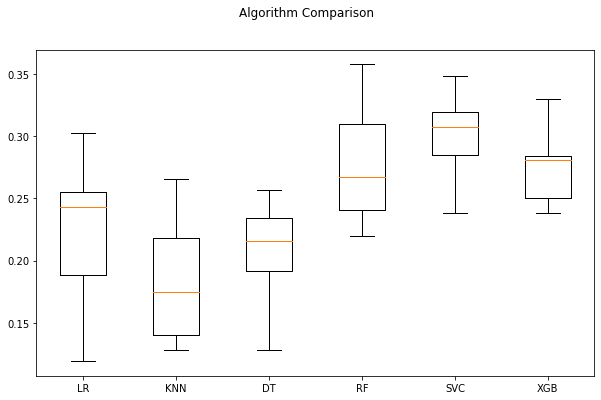

In [26]:
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Observations:
Based on the above plot, we can verify SVC is performing better with comparison among the other algorithms. So we will choose SVC for model and do hyper parameter tuning to further improve the accuracy.

### Hyper parameter tuning

In [27]:
estimator = SVC()
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0, 100.0], 
    'gamma': ['scale', 1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

kfold = KFold(n_splits=10)
grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=kfold)

grid_result = grid.fit(X_train_pca, y_train.argmax(axis=1))

In [28]:
print('The best params: %s' % grid_result.best_params_)
print('The best score: %s' % grid_result.best_score_)

The best params: {'C': 10.0, 'gamma': 0.001, 'kernel': 'rbf'}
The best score: 0.3124108053007135


#### Observations:
1. We have tuned the parameter of SVC model and printed out the best params.
2. The score has been slightly improved after hyperparameter tuning.
____

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.initializers import HeNormal, HeUniform
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [30]:
data_generator = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

## Classifier model using Neural Networks

In [31]:
def create_model(layers, optimizer, loss, metrics, epochs, batch_size, checkpoint_path):
    model = Sequential()
    
    for layer in layers:
        model.add(layer)  
    
    print(model.summary())

    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    
    callbacks = [
        ModelCheckpoint(filepath=checkpoint_path, save_best_only=True, monitor='val_acc', mode='max', verbose=1),
        EarlyStopping(monitor='val_loss', patience=10, verbose=2)
    ]
    
    
    
    history = model.fit_generator(
        data_generator.flow(X_train, y_train, batch_size=batch_size, shuffle=True),
        validation_data=data_generator.flow(X_test, y_test, shuffle=False, batch_size=batch_size),
        epochs=epochs,
        callbacks=callbacks
    )

    print('_' * 100)
    print('\n')
    print('Plots of training and validation loss and accuracy \n')

    fig = plt.figure(figsize=(16, 6))
    fig.add_subplot(1, 2, 1, title='Training and Validation loss')
    plt.plot(history.epoch, history.history['loss'])
    plt.plot(history.epoch, history.history['val_loss'])
    plt.legend(['loss', 'val_loss'])

    fig.add_subplot(1, 2, 2, title='Training and Validation Accuracy')
    plt.plot(history.epoch, history.history['acc'])
    plt.plot(history.epoch, history.history['val_acc'])
    plt.legend(['accuracy', 'val_accuracy'])
    plt.show()
    plt.close()
    
    print('_' * 100)
    
    print('\n')
    print('Best Accuracy')
    print('accuracy:', np.max(history.history['acc']))
    print('\n')
    print('Best Validation Accuracy')
    print('Score:', np.max(history.history['val_acc']))

    return history, model

<b>Iteration 1</b>: Train a neural network with basic architecture consists of BatchNormalization, Dense and Dropout layers

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 150528)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 150528)            602112    
_________________________________________________________________
dense (Dense)                (None, 64)                9633856   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1

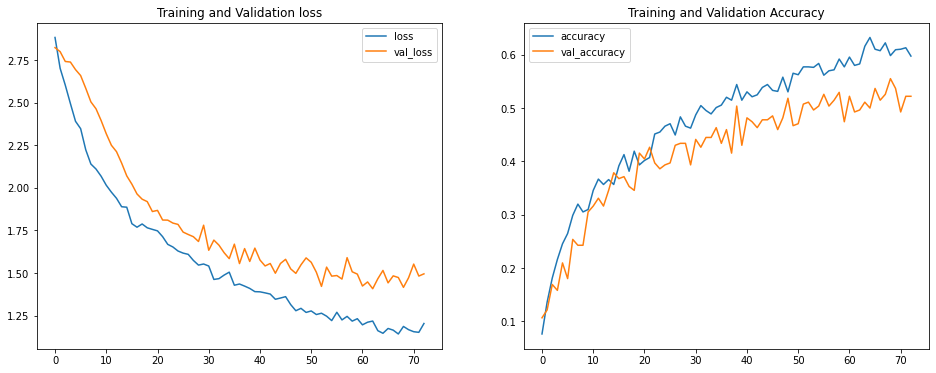

____________________________________________________________________________________________________


Best Accuracy
accuracy: 0.63235295


Best Validation Accuracy
Score: 0.55514705


In [32]:
layers = [
    Flatten(input_shape=X.shape[1:]),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(17, activation='softmax')
]

history, model = create_model(layers, 'sgd', 'categorical_crossentropy', ['accuracy'], 100, 64, 'ann/model.h5')

#### Observations:
The best accuracy we got more than 60% and validation accuracy of around 55%. In next step, we will use adam as optimizer and check.

___

<b>Iteration 2:</b> Using adam as optimizer.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 150528)            602112    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                9633856   
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
dense_9 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

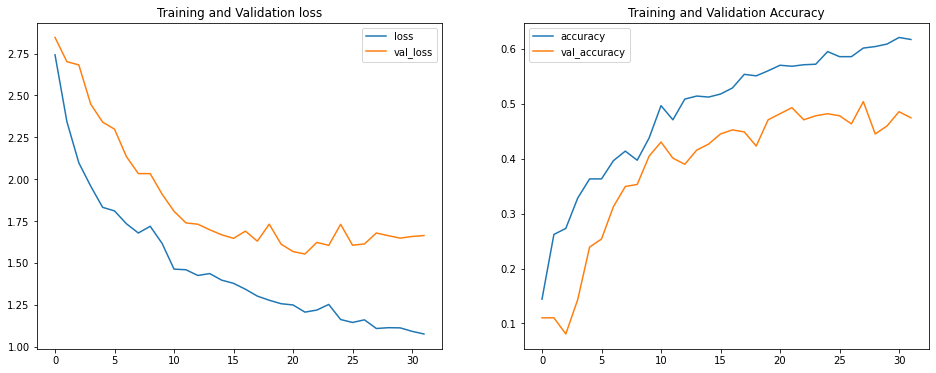

____________________________________________________________________________________________________


Best Accuracy
accuracy: 0.6204044


Best Validation Accuracy
Score: 0.5036765


In [33]:
layers = [
    Flatten(input_shape=X.shape[1:]),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(17, activation='softmax')
]

history, model = create_model(layers, 'adam', 'categorical_crossentropy', ['accuracy'], 100, 64, 'ann/model.h5')

#### Observations:
The accuracy and validation accuracy have been decreased, hence lets optimize the adam and check.

___

<b>Iteration 3:</b> Tuning the parameter for adam optimizer

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 150528)            602112    
_________________________________________________________________
dense_14 (Dense)             (None, 64)                9633856   
_________________________________________________________________
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_7 (Batch (None, 64)                256       
_________________________________________________________________
dense_16 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_17 (Dense)             (None, 128)              

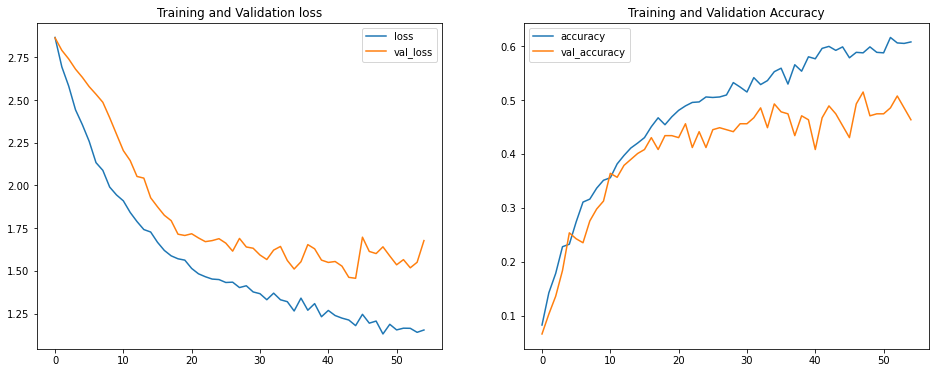

____________________________________________________________________________________________________


Best Accuracy
accuracy: 0.61580884


Best Validation Accuracy
Score: 0.5147059


In [34]:
layers = [
    Flatten(input_shape=X.shape[1:]),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(17, activation='softmax')
]

adam = Adam(learning_rate=0.0001, amsgrad=True)
history, model = create_model(layers, adam, 'categorical_crossentropy', ['accuracy'], 100, 64, 'ann/model.h5')

#### Observations:
We have got better validation accuracy than previous iteration although this is not the best accuracy. We will change in the batch size and check.
___

<b>Iteration 4:</b> Changing the batch size

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 150528)            0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 150528)            602112    
_________________________________________________________________
dense_21 (Dense)             (None, 64)                9633856   
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_10 (Batc (None, 64)                256       
_________________________________________________________________
dense_23 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_24 (Dense)             (None, 128)              

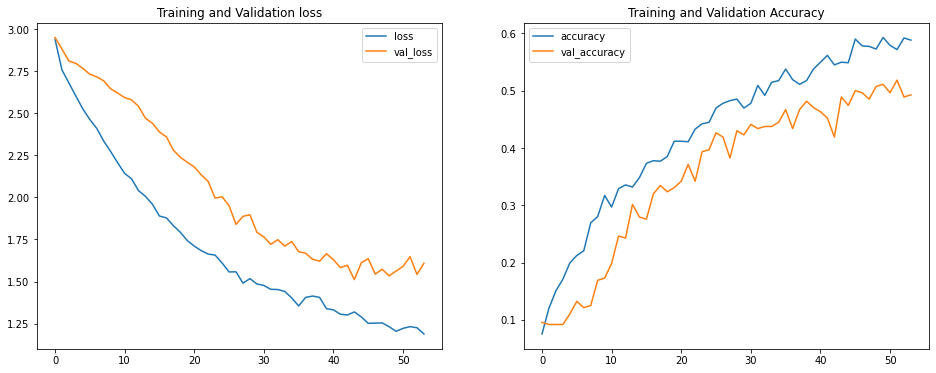

____________________________________________________________________________________________________


Best Accuracy
accuracy: 0.5928309


Best Validation Accuracy
Score: 0.5183824


In [35]:
layers = [
    Flatten(input_shape=X.shape[1:]),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(17, activation='softmax')
]

adam = Adam(learning_rate=0.0001, amsgrad=True)
history, model = create_model(layers, adam, 'categorical_crossentropy', ['accuracy'], 100, 128, 'ann/model.h5')

#### Observations:
In this iteration, the validation accuracy has slightly decreased. Although the model is not performing overall good and here it less overfitting. With compare to earlier iterations, the model is better hence we will keep this iteration architecture as final.
___

## Classifier model using Convolutional Neural Networks

In [36]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalMaxPool2D, Flatten, InputLayer, GlobalAveragePooling2D

<b>Iteration 1:</b> Training a basic CNN with Conv2D, Flatten and Dense layers

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 70, 70, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       204928    
_________________________________________________________________
flatten_4 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)              

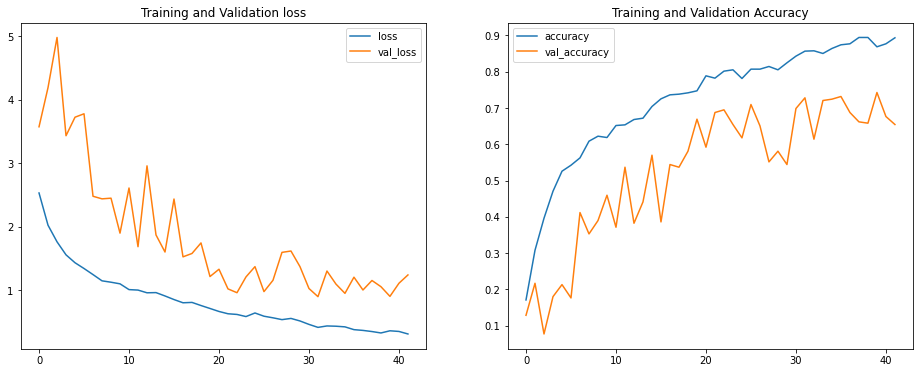

____________________________________________________________________________________________________


Best Accuracy
accuracy: 0.8943015


Best Validation Accuracy
Score: 0.74264705


In [37]:
layers = [
    Conv2D(32, kernel_size=(3, 3), input_shape=X.shape[1:], activation='relu'),
    MaxPooling2D(3, 3),
    Conv2D(64, kernel_size=(5, 5), activation='relu'),
    MaxPooling2D(5, 5),
    Conv2D(128, kernel_size=(5, 5), activation='relu'),
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(17, activation='softmax')
]

history, model = create_model(layers, 'adam', 'categorical_crossentropy', ['accuracy'], 100, 128, 'cnn/model.h5')

#### Observations:
As it can be seen the training accuracy is around 89% while the validation accuracy is 74%. The model is currently overfitting. In next iteration, we will tune the optimizer to further improve the model.
___

<b>Iteration 2:</b> Tuning the optimizer

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 70, 70, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 128)       204928    
_________________________________________________________________
flatten_5 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)              

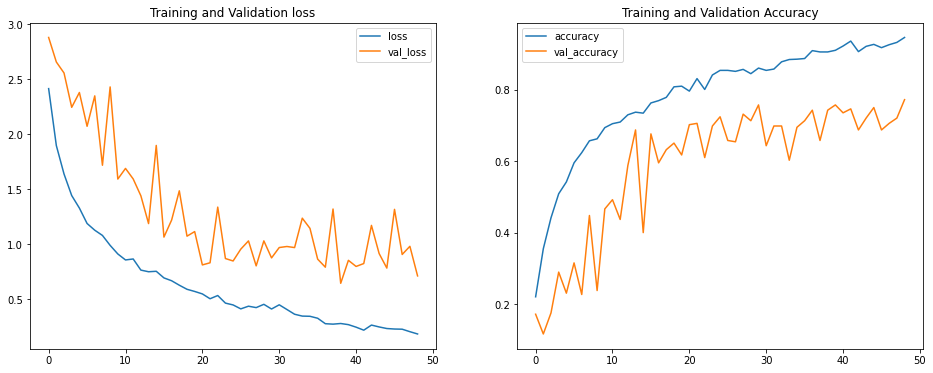

____________________________________________________________________________________________________


Best Accuracy
accuracy: 0.94577205


Best Validation Accuracy
Score: 0.77205884


In [38]:
layers = [
    Conv2D(32, strides=(1, 1), kernel_size=(3, 3), input_shape=X.shape[1:], activation='relu'),
    MaxPooling2D(3, 3),
    Conv2D(64, strides=(1, 1), kernel_size=(5, 5), activation='relu'),
    MaxPooling2D(5, 5),
    Conv2D(128, strides=(1, 1), kernel_size=(5, 5), activation='relu'),
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(17, activation='softmax')
]

adam = Adam(learning_rate=0.001, amsgrad=True)
history, model = create_model(layers, adam, 'categorical_crossentropy', ['accuracy'], 100, 128, 'cnn/model.h5')

#### Observations:
We have improved the training and validation accuracy. Lets try to add more layers and tune the parameters.

<b>Iteration 3:</b> Modifying the architecture

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 55, 55, 64)        9472      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 256)         819456    
_________________________________________________________________
flatten_6 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_34 (Dense)             (None, 512)              

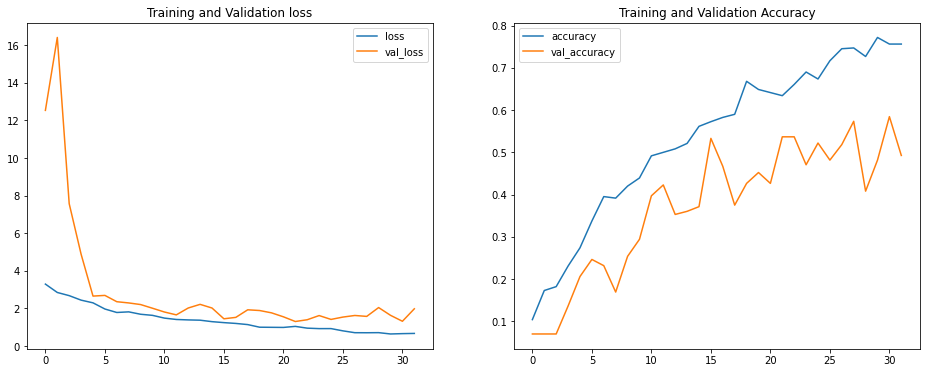

____________________________________________________________________________________________________


Best Accuracy
accuracy: 0.77205884


Best Validation Accuracy
Score: 0.58455884


In [39]:
layers = [
    Conv2D(64, strides=(4, 4), kernel_size=(7, 7), input_shape=X.shape[1:], activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(128, strides=(1, 1), kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(5, 5), strides=(2, 2)),
    Conv2D(256, strides=(1, 1), kernel_size=(5, 5), activation='relu'),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(1024, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(17, activation='softmax')
]

adam = Adam(learning_rate=0.001, amsgrad=True)
history, model = create_model(layers, adam, 'categorical_crossentropy', ['accuracy'], 100, 128, 'cnn/model.h5')

#### Observations:
The accuracy further went down after adding more layers.. Hence Iteration 2 model is best model among all iterations.
____

## Classifier model using ResNet50

In [48]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50, VGG16

In [41]:
data_generator = ImageDataGenerator(
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    rotation_range=10,
    shear_range=0.3,
    zoom_range=0.5,
    horizontal_flip=True,
    vertical_flip=True
)

train_data = data_generator.flow(X_train*255, y_train, shuffle=True, batch_size=16)

test_data = data_generator.flow(X_test*255, y_test, shuffle=False, batch_size=16)

In [42]:
def create_transfer_model(model, optimizer, loss, metrics, epochs, checkpoint_path):    
    print(model.summary())

    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    
    callbacks = [
        ModelCheckpoint(filepath=checkpoint_path, save_best_only=True, monitor='val_acc', mode='max', verbose=1)
    ]
    
    history = model.fit_generator(
        train_data,
        validation_data=test_data,
        epochs=epochs, 
        callbacks=callbacks
    )

    print('_' * 100)
    print('\n')
    print('Plots of training and validation loss and accuracy \n')

    fig = plt.figure(figsize=(16, 6))
    fig.add_subplot(1, 2, 1, title='Training and Validation loss')
    plt.plot(history.epoch, history.history['loss'])
    plt.plot(history.epoch, history.history['val_loss'])
    plt.legend(['loss', 'val_loss'])

    fig.add_subplot(1, 2, 2, title='Training and Validation Accuracy')
    plt.plot(history.epoch, history.history['acc'])
    plt.plot(history.epoch, history.history['val_acc'])
    plt.legend(['accuracy', 'val_accuracy'])
    plt.show()
    plt.close()
    
    print('_' * 100)
    
    print('\n')
    print('Best Accuracy')
    print('accuracy:', np.max(history.history['acc']))
    print('\n')
    print('Best Validation Accuracy')
    print('Score:', np.max(history.history['val_acc']))

    return history

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_9 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_39 (Dense)             (None, 256)               25690368  
_________________________________________________________________
batch_normalization_16 (Batc (None, 256)               1024      
_________________________________________________________________
dense_40 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 17)              

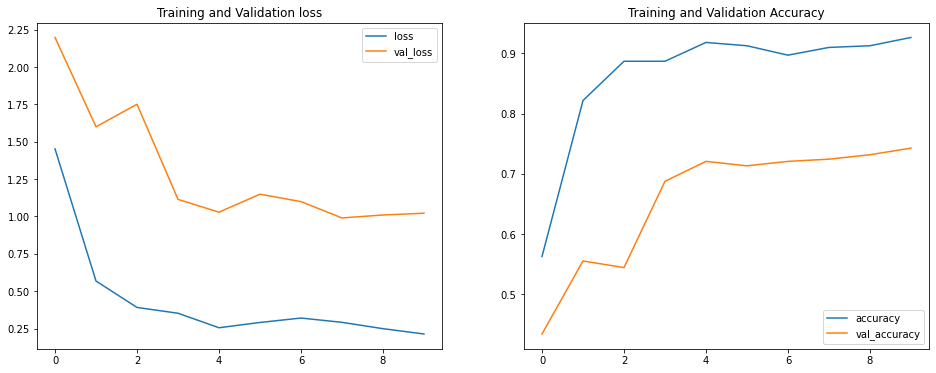

____________________________________________________________________________________________________


Best Accuracy
accuracy: 0.9264706


Best Validation Accuracy
Score: 0.74264705


In [46]:
resnet = ResNet50(include_top=False, input_shape = X.shape[1:], weights='imagenet')

for layer in resnet.layers[:-4]:
    layer.trainable = False

model = Sequential(resnet)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(17, activation='softmax'))

history = create_transfer_model(model, 'adam', 'categorical_crossentropy', ['accuracy'], 10, 'resnet/model.h5')

#### Observations:
The model training accuracy is 92% while the validation accuracy is around 74%. The model is overfitting but providing higher training accuracy. We can further improve but currently we will choose this architecture and evaluate the model.
___

58892288/58889256 [==============================] - 102s 2us/step
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_10 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_42 (Dense)             (None, 256)               6422784   
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
dense_43 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
____________________________________________________

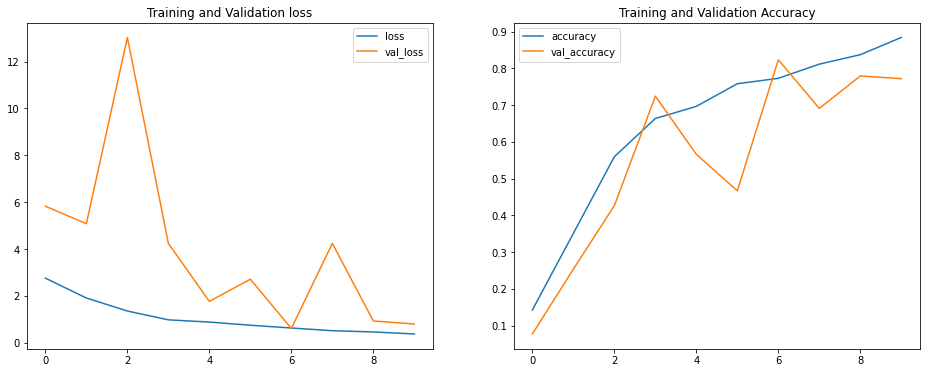

____________________________________________________________________________________________________


Best Accuracy
accuracy: 0.88419116


Best Validation Accuracy
Score: 0.8235294


In [49]:
resnet = VGG16(include_top=False, input_shape = X.shape[1:], weights='imagenet')

for layer in resnet.layers[:-4]:
    layer.trainable = False

model = Sequential(resnet)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(17, activation='softmax'))

history = create_transfer_model(model, 'adam', 'categorical_crossentropy', ['accuracy'], 10, 'vgg16/model.h5')

#### Observations:
The training accuracy is 88% and the validation accuracy is 82% hence the model is performing good in training and validation.

___

## Comparison between SVC, DNN, CNN, ResNet and VGG16 models 

In earlier steps, we have built and finalized the models with tuning the parameters, let build the models and compare the accuracy and results.

### Supervised Learning Model

In [52]:
svc_model = SVC(C=10.0, gamma=0.001, kernel='rbf')
svc_model.fit(X_train_pca, y_train.argmax(axis=1))

print('The training accuracy using SVC', svc_model.score(X_train_pca, y_train.argmax(axis=1)))
print('The testing accuracy using SVC', svc_model.score(X_test_pca, y_test.argmax(axis=1)))

The training accuracy using SVC 1.0
The testing accuracy using SVC 0.3713235294117647


### Neural Network Model

In [58]:
dnn_model = Sequential([
    Flatten(input_shape=X.shape[1:]),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(17, activation='softmax')
])

adam = Adam(learning_rate=0.0001, amsgrad=True)
dnn_model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=2),
    ModelCheckpoint(filepath='ann/best_model.h5', monitor='val_acc', save_best_only=True, mode='max', verbose=2)
]

histroy_dnn_model = dnn_model.fit_generator(train_data, validation_data=test_data, epochs=100, callbacks=callbacks)

print('\nThe training accuracy using DNN', dnn_model.evaluate_generator(train_data))
print('The testing accuracy using DNN', dnn_model.evaluate_generator(test_data))

Epoch 1/100
68/68 [==============================] - ETA: 0s - batch: 33.5000 - size: 16.0000 - loss: 2.8815 - acc: 0.0726
Epoch 00001: val_acc improved from -inf to 0.06985, saving model to ann/best_model.h5
68/68 [==============================] - 23s 281ms/step - batch: 33.5000 - size: 16.0000 - loss: 2.8815 - acc: 0.0726 - val_loss: 3.1271 - val_acc: 0.0699
Epoch 2/100
68/68 [==============================] - ETA: 0s - batch: 33.5000 - size: 16.0000 - loss: 2.7194 - acc: 0.1241
Epoch 00002: val_acc improved from 0.06985 to 0.13235, saving model to ann/best_model.h5
68/68 [==============================] - 14s 211ms/step - batch: 33.5000 - size: 16.0000 - loss: 2.7194 - acc: 0.1241 - val_loss: 2.7213 - val_acc: 0.1324
Epoch 3/100
68/68 [==============================] - ETA: 0s - batch: 33.5000 - size: 16.0000 - loss: 2.6119 - acc: 0.1664
Epoch 00003: val_acc improved from 0.13235 to 0.17647, saving model to ann/best_model.h5
68/68 [==============================] - 14s 215ms/step -

___
### Convolutional Neural Network Model

In [61]:
cnn_model = Sequential([
    Conv2D(32, strides=(1, 1), kernel_size=(3, 3), input_shape=X.shape[1:], activation='relu'),
    MaxPooling2D(3, 3),
    Conv2D(64, strides=(1, 1), kernel_size=(5, 5), activation='relu'),
    MaxPooling2D(5, 5),
    Conv2D(128, strides=(1, 1), kernel_size=(5, 5), activation='relu'),
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(17, activation='softmax')
])

adam = Adam(learning_rate=0.001, amsgrad=True)
cnn_model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=2),
    ModelCheckpoint(filepath='cnn/best_model.h5', monitor='val_acc', save_best_only=True, mode='max', verbose=2)
]

cnn_model.fit_generator(train_data, validation_data=test_data, epochs=100, callbacks=callbacks)

print('\nThe training accuracy using CNN', cnn_model.evaluate_generator(train_data))
print('The testing accuracy using CNN', cnn_model.evaluate_generator(test_data))

Epoch 1/100
68/68 [==============================] - ETA: 0s - batch: 33.5000 - size: 16.0000 - loss: 2.5832 - acc: 0.1645
Epoch 00001: val_acc improved from -inf to 0.06985, saving model to cnn/best_model.h5
68/68 [==============================] - 34s 451ms/step - batch: 33.5000 - size: 16.0000 - loss: 2.5832 - acc: 0.1645 - val_loss: 95.6976 - val_acc: 0.0699
Epoch 2/100
68/68 [==============================] - ETA: 0s - batch: 33.5000 - size: 16.0000 - loss: 2.3460 - acc: 0.2142
Epoch 00002: val_acc improved from 0.06985 to 0.20221, saving model to cnn/best_model.h5
68/68 [==============================] - 32s 468ms/step - batch: 33.5000 - size: 16.0000 - loss: 2.3460 - acc: 0.2142 - val_loss: 2.9105 - val_acc: 0.2022
Epoch 3/100
68/68 [==============================] - ETA: 0s - batch: 33.5000 - size: 16.0000 - loss: 2.0831 - acc: 0.2803
Epoch 00003: val_acc did not improve from 0.20221
68/68 [==============================] - 32s 469ms/step - batch: 33.5000 - size: 16.0000 - loss

___
### ResNet Model

In [62]:
resnet = ResNet50(include_top=False, input_shape = X.shape[1:], weights='imagenet')

for layer in resnet.layers[:-4]:
    layer.trainable = False

resnet_model = Sequential([
    resnet, 
    Flatten(), 
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'), 
    Dropout(0.2),
    Dense(17, activation='softmax')
])

resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=2),
    ModelCheckpoint(filepath='resnet/best_model.h5', monitor='val_acc', save_best_only=True, mode='max', verbose=2)
]

resnet_model.fit_generator(train_data, validation_data=test_data, epochs=100, callbacks=callbacks)

print('\nThe training accuracy using ResNet', resnet_model.evaluate_generator(train_data))
print('The testing accuracy using ResNet', resnet_model.evaluate_generator(test_data))

Epoch 1/100
68/68 [==============================] - ETA: 0s - batch: 33.5000 - size: 16.0000 - loss: 1.3648 - acc: 0.5910
Epoch 00001: val_acc improved from -inf to 0.55515, saving model to resnet/best_model.h5
68/68 [==============================] - 116s 2s/step - batch: 33.5000 - size: 16.0000 - loss: 1.3648 - acc: 0.5910 - val_loss: 1.9698 - val_acc: 0.5551
Epoch 2/100
68/68 [==============================] - ETA: 0s - batch: 33.5000 - size: 16.0000 - loss: 0.5896 - acc: 0.8171
Epoch 00002: val_acc improved from 0.55515 to 0.64706, saving model to resnet/best_model.h5
68/68 [==============================] - 109s 2s/step - batch: 33.5000 - size: 16.0000 - loss: 0.5896 - acc: 0.8171 - val_loss: 1.3027 - val_acc: 0.6471
Epoch 3/100
68/68 [==============================] - ETA: 0s - batch: 33.5000 - size: 16.0000 - loss: 0.3689 - acc: 0.8805
Epoch 00003: val_acc improved from 0.64706 to 0.67647, saving model to resnet/best_model.h5
68/68 [==============================] - 109s 2s/ste

___
### VGG16 Model

In [63]:
vgg16 = VGG16(include_top=False, input_shape = X.shape[1:], weights='imagenet')

for layer in vgg16.layers[:-4]:
    layer.trainable = False

vgg16_model = Sequential([
    vgg16, 
    Flatten(), 
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'), 
    Dropout(0.2),
    Dense(17, activation='softmax')
])

vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=2),
    ModelCheckpoint(filepath='vgg16/best_model.h5', monitor='val_acc', save_best_only=True, mode='max', verbose=2)
]

vgg16_model.fit_generator(train_data, validation_data=test_data, epochs=100, callbacks=callbacks)

print('\nThe training accuracy using VGG16', vgg16_model.evaluate_generator(train_data))
print('The testing accuracy using VGG16', vgg16_model.evaluate_generator(test_data))

Epoch 1/100
68/68 [==============================] - ETA: 0s - batch: 33.5000 - size: 16.0000 - loss: 2.3908 - acc: 0.2381
Epoch 00001: val_acc improved from -inf to 0.18015, saving model to vgg16/best_model.h5
68/68 [==============================] - 274s 4s/step - batch: 33.5000 - size: 16.0000 - loss: 2.3908 - acc: 0.2381 - val_loss: 3.7797 - val_acc: 0.1801
Epoch 2/100
68/68 [==============================] - ETA: 0s - batch: 33.5000 - size: 16.0000 - loss: 1.6104 - acc: 0.4550
Epoch 00002: val_acc improved from 0.18015 to 0.44853, saving model to vgg16/best_model.h5
68/68 [==============================] - 273s 4s/step - batch: 33.5000 - size: 16.0000 - loss: 1.6104 - acc: 0.4550 - val_loss: 3.9581 - val_acc: 0.4485
Epoch 3/100
68/68 [==============================] - ETA: 0s - batch: 33.5000 - size: 16.0000 - loss: 1.0855 - acc: 0.6379
Epoch 00003: val_acc did not improve from 0.44853
68/68 [==============================] - 271s 4s/step - batch: 33.5000 - size: 16.0000 - loss: 1

### Plotting confusion matrix of each model

In [97]:
svc_pred_ = svc_model.predict(X_test_pca)
dnn_pred_ = dnn_model.predict_generator(test_data)
cnn_pred_ = cnn_model.predict_generator(test_data)
resnet_pred_ = resnet_model.predict_generator(test_data)
vgg16_pred_ = vgg16_model.predict_generator(test_data)

In [65]:
from sklearn.metrics import confusion_matrix, classification_report

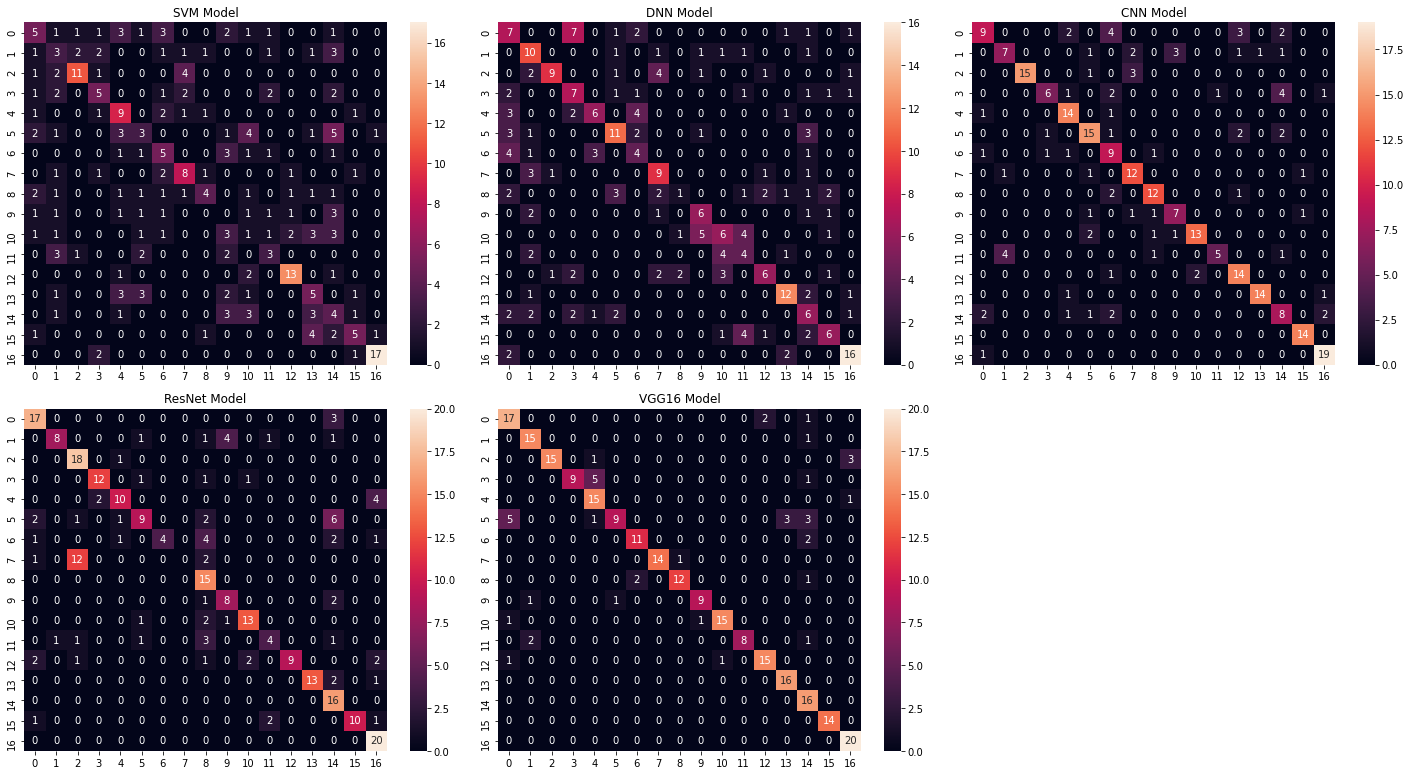

In [98]:
fig = plt.figure(figsize=(20, 16))

ax = fig.add_subplot(3, 3, 1, title='SVM Model')
sns.heatmap(confusion_matrix(y_test.argmax(axis=1), svc_pred_), annot=True, fmt='g')

ax = fig.add_subplot(3, 3, 2, title='DNN Model')
sns.heatmap(confusion_matrix(y_test.argmax(axis=1), dnn_pred_.argmax(axis=1)), annot=True, fmt='g')

ax = fig.add_subplot(3, 3, 3, title='CNN Model')
sns.heatmap(confusion_matrix(y_test.argmax(axis=1), cnn_pred_.argmax(axis=1)), annot=True, fmt='g')

ax = fig.add_subplot(3, 3, 4, title='ResNet Model')
sns.heatmap(confusion_matrix(y_test.argmax(axis=1), resnet_pred_.argmax(axis=1)), annot=True, fmt='g')

ax = fig.add_subplot(3, 3, 5, title='VGG16 Model')
sns.heatmap(confusion_matrix(y_test.argmax(axis=1), vgg16_pred_.argmax(axis=1)), annot=True, fmt='g')

fig.tight_layout()
plt.show()

In [99]:
print('SVM Model Classification Report')
print(classification_report(y_test.argmax(axis=1), svc_pred_))

SVM Model Classification Report
              precision    recall  f1-score   support

           0       0.31      0.25      0.28        20
           1       0.17      0.19      0.18        16
           2       0.73      0.58      0.65        19
           3       0.38      0.33      0.36        15
           4       0.39      0.56      0.46        16
           5       0.23      0.14      0.18        21
           6       0.29      0.38      0.33        13
           7       0.47      0.53      0.50        15
           8       0.50      0.27      0.35        15
           9       0.00      0.00      0.00        11
          10       0.07      0.06      0.06        17
          11       0.30      0.27      0.29        11
          12       0.72      0.76      0.74        17
          13       0.28      0.31      0.29        16
          14       0.15      0.25      0.19        16
          15       0.50      0.36      0.42        14
          16       0.89      0.85      0.87      

In [100]:
print('DNN Model Classification Report')
print(classification_report(y_test.argmax(axis=1), dnn_pred_.argmax(axis=1)))

DNN Model Classification Report
              precision    recall  f1-score   support

           0       0.28      0.35      0.31        20
           1       0.42      0.62      0.50        16
           2       0.82      0.47      0.60        19
           3       0.35      0.47      0.40        15
           4       0.60      0.38      0.46        16
           5       0.55      0.52      0.54        21
           6       0.31      0.31      0.31        13
           7       0.47      0.60      0.53        15
           8       0.25      0.07      0.11        15
           9       0.43      0.55      0.48        11
          10       0.40      0.35      0.38        17
          11       0.27      0.36      0.31        11
          12       0.55      0.35      0.43        17
          13       0.67      0.75      0.71        16
          14       0.30      0.38      0.33        16
          15       0.50      0.43      0.46        14
          16       0.76      0.80      0.78      

In [101]:
print('CNN Model Classification Report')
print(classification_report(y_test.argmax(axis=1), cnn_pred_.argmax(axis=1)))

CNN Model Classification Report
              precision    recall  f1-score   support

           0       0.64      0.45      0.53        20
           1       0.58      0.44      0.50        16
           2       1.00      0.79      0.88        19
           3       0.75      0.40      0.52        15
           4       0.70      0.88      0.78        16
           5       0.68      0.71      0.70        21
           6       0.41      0.69      0.51        13
           7       0.67      0.80      0.73        15
           8       0.75      0.80      0.77        15
           9       0.64      0.64      0.64        11
          10       0.87      0.76      0.81        17
          11       0.83      0.45      0.59        11
          12       0.67      0.82      0.74        17
          13       0.93      0.88      0.90        16
          14       0.44      0.50      0.47        16
          15       0.88      1.00      0.93        14
          16       0.83      0.95      0.88      

In [102]:
print('ResNet Model Classification Report')
print(classification_report(y_test.argmax(axis=1), resnet_pred_.argmax(axis=1)))

ResNet Model Classification Report
              precision    recall  f1-score   support

           0       0.71      0.85      0.77        20
           1       0.89      0.50      0.64        16
           2       0.55      0.95      0.69        19
           3       0.86      0.80      0.83        15
           4       0.77      0.62      0.69        16
           5       0.69      0.43      0.53        21
           6       1.00      0.31      0.47        13
           7       0.00      0.00      0.00        15
           8       0.47      1.00      0.64        15
           9       0.62      0.73      0.67        11
          10       0.81      0.76      0.79        17
          11       0.57      0.36      0.44        11
          12       1.00      0.53      0.69        17
          13       1.00      0.81      0.90        16
          14       0.48      1.00      0.65        16
          15       1.00      0.71      0.83        14
          16       0.69      1.00      0.82   

In [103]:
print('VGG16 Model Classification Report')
print(classification_report(y_test.argmax(axis=1), vgg16_pred_.argmax(axis=1)))

VGG16 Model Classification Report
              precision    recall  f1-score   support

           0       0.71      0.85      0.77        20
           1       0.83      0.94      0.88        16
           2       1.00      0.79      0.88        19
           3       1.00      0.60      0.75        15
           4       0.68      0.94      0.79        16
           5       0.90      0.43      0.58        21
           6       0.85      0.85      0.85        13
           7       1.00      0.93      0.97        15
           8       0.92      0.80      0.86        15
           9       0.90      0.82      0.86        11
          10       0.94      0.88      0.91        17
          11       1.00      0.73      0.84        11
          12       0.88      0.88      0.88        17
          13       0.84      1.00      0.91        16
          14       0.62      1.00      0.76        16
          15       1.00      1.00      1.00        14
          16       0.83      1.00      0.91    

#### Observations and Conclusion:
1. Based on the comparison of training and testing accuracy, VGG16 is performing the best.
2. SVM model is perfoming very poorly where we have got the training accuracy of 100% while on testing we got only 37%. It is highly a overfit model. 
3. While on the other hand, ANN model got 53% and 47%, CNN got 76% and 73%, ResNet got 68% and 63% and VGG16 got 92% and 86% as training and testing accuracy where we can see the models are not overfitting.
3. Although ANN and ResNet models are performing poorly on the dataset having less accuracy then CNN is having better accuracy. VGG16 having the best accuracy among all the trained models.
4. Also, based on the classification report, for SVM model, the average weight recall is only 38% and individual classes precision, f1 and recall are low which shows the supervised learning model is unable to learn anything for all classes and completely a overfit model.
5. While in DNN, we can see few classes have low precision, recall and f1 score but for few classes, the score is more than 50%. Hence we can conclude that ANN is performing better than SVM model but overall is not good for classifying the flowers.
6. The CNN model is performing the better having overall weighted average of precision as 73%. As we can see in confusion matrix, for one class only it was able to classify 100% correctly.
7. ResNet model is performing poorly on the overall accuracy with compared to CNN but as we can see in classification report, for 4 classes it has predicted 100% correctly but has failed to predict on one class and weighted average precision is 71%, recall is 68% and f1-score is 66% while is lower than CNN model.
8. While on the other hand, VGG16 is performing very good having the accuracy above 85%. Also, the weighted average precision, recall and f1 score is above 87%, 85% and 84% respectively.
9. Also, VGG16 model is able to few classes 100% correctly while few classes have above 90% precision, recall and f1 score.
10. Hence we can conclude that VGG16 model is performing the best and will be optimal for production environment. 

### Saving the best model

In [110]:
vgg16.save('best_model.h5', overwrite=True)
cnn_model.save('cnn_model.h5', overwrite=True)
resnet_model.save('resnet_model.h5', overwrite=True)

In [109]:
import pickle
pickle.dump(data_generator, open('data_generator.pkl', 'wb'))

## Building the GUI for classifying the image

In [108]:
import tkinter as tk
from tensorflow.keras import models
from tkinter import *

In [115]:
cnn_model = models.load_model('cnn_model.h5', compile=False)
resnet_model = models.load_model('resnet_model.h5', compile=False)
vgg_model = models.load_model('best_model.h5', compile=False)

In [121]:
app = tk.Tk()
app.title('FLOWER CLASSIFICATION')
app.geometry('700x360')

# -------- Row 1 ------------
## Label
input_label = Label(text='Step 1: File Name')
input_label.grid(row=1, column=1, sticky=tk.W)

## Input
input_file_var = tk.StringVar()
input_file_box = Entry(app, width=20, text=input_file_var)
input_file_box.grid(row=1, column=2)

def import_data():
    global image
    try:
        image = cv2.imread(input_file_var.get())
        image = cv2.resize(image, (224, 224))
        import_confirm = 'Image Imported Successfully.'
    except Exception as e:
        import_confirm = 'Image Not Found.'
    import_confirmbox = Entry(app, width=25)
    import_confirmbox.grid(row=1, column=4)
    import_confirmbox.insert(1, import_confirm)
    import_confirmbox.configure(state='disabled')

## Button
import_button = Button(app, text='Import Data', width=16, command=import_data)
import_button.grid(row=1, column=3, sticky=tk.W)

# -------- Row 2 ------------
## Label
target_label = Label(text='Step 2: Select Model')
target_label.grid(row=2, column=1, sticky=tk.W)

selectedModel = IntVar()

rad1 = Radiobutton(app, text='CNN Model', value=1, variable=selectedModel)
rad2 = Radiobutton(app, text='ResNet Model', value=2, variable=selectedModel)
rad3 = Radiobutton(app, text='VGG16 Model', value=3, variable=selectedModel)

rad1.grid(column=2, row=2)
rad2.grid(column=3, row=2)
rad3.grid(column=4, row=2)

def classify():
    model = None
    if selectedModel.get() == 1:
        model = cnn_model
    elif selectedModel.get() == 2:
        model = resnet_model
    else:
        model = vgg_model
    pred_ = model.predict(np.expand_dims(image, axis=0))
    import_confirmbox = Entry(app, width=25)
    import_confirmbox.grid(row=3, column=4)
    import_confirmbox.insert(1, 'Predicted Class:' + str(pred_.argmax()))
    import_confirmbox.configure(state='disabled')
        
# -------- Row 3 ------------
## Label
target_label = Label(text='Step 3: Classify Image')
target_label.grid(row=3, column=1, sticky=tk.W)

## Button
target_button = Button(app, text='Predict', width=16, command=classify)
target_button.grid(row=3, column=2, sticky=tk.W)

In [122]:
app.mainloop()

#### User Interface

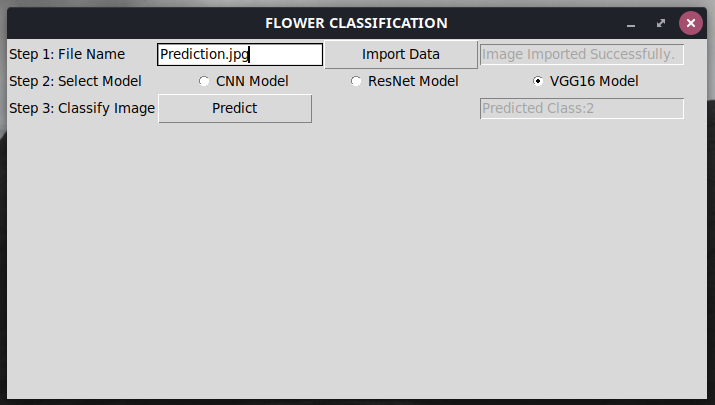

# Strategy to maintain and support the AIML image classifier in production

### Portability

Most of the times, model development work happened using Jupyter Notebook or an IDE where we write code to create and evaluate the models. Taking the developed model into the production requires model to be converted into serialized or compressed formats which is lightweight and language independent. There are few formats which fulfil this requirement are as follows:

1. Pickle
2. ONNX (Open Neural Network Exchange)
3. PMML (Predictive Model Markup Language)
4. PFA (Portable Format for Analytics)
5. HDF5/H5 (Hierarchial Data Format Version 5)

Using the above formats, the models can be serialized or compressed and enable to DevOps pipeline to put into production. 

### Deployment 
There are mainly 3 ways through which the models can be utilized into production:

<b>1. Offline Prediction:</b> Offline predictions generally done for large input datasets where there is no dependency on the current data and can be used for future planning or decision making purpose. Example: Predicting the AQI value for tomorrow morning or later time of period so a person can avoid bad environment condition. 
<b>2. Online Prediction:</b> Online predictions uses real-time data generally trigger based on an event occured to get prediction or recommendations based on the current input data. Example: Estimating the delivery time for food after a order is placed.
<b>3. Real-time Streaming Prediction:</b> The predictions done on the real-time streaming/ continuous data where model needs to run for predict as soon as data enters into the system. Example: Detecting the anomalies on streaming data.

### Monitoring

As the model is doing predictions, it is important to monitor and compare the actual with predicted values as well. It is important to provide warnings where things can go wrong in production environment. With the time period of deployment, there are 3 main problems/scenarios can come where model cannot perform:
1. The data on which the model is trained is getting change over the period of time.
2. The model is not able to anticipate the population over the period of time.
3. The model is generalizing the data too much and unable to pick up the patterns based on external factors or user behavior patters.

In order to overcome these challenges, there needs to be a process that measures the model's performance against the new data and if models fall below the threshold value then a newly trained model should be built on the new data and deployed into production.

#### Image(Flowers) Classifier Use Case

1. The model which we have built is having less data and the accuracy using VGG16 model is within acceptable range. The model can be improved further by providing more data and further enhancing the model hyper parameters.
2. The model can be saved as H5 file format which Keras support directly or can be saved in any of the format which we have explained above.
3. A single wrapper application can be built using Flask which is a lightweight framework for building web service.
4. In the wrapper application, we can define the function to load the model and predict the class based on the input data and expose as an API Service.
5. Apart from prediction, we can define another function to evaluate the model on a schedule basis.
6. The same application can be deployed into production through DevSecOps process using CI/CD pipeline or in a container using Docker/Kubernetes.
7. In the scheduler, we can define the threshold value of evaluation for generating a warning when the accuracy goes below the threshold e.g. 70%.
8. Once the accuracy get below 70%, we can trigger a process where the model can be trained on the new images data and check for accuracy.
9. After training the new data, even if the accuracy is not increasing, then it always good to take the model back to development stage and a new model to be develop for classifying the image.
___